In [15]:
# !pip install --user --upgrade catboost
# !pip install --user --upgrade ipywidgets
# !pip install shap
# !pip install sklearn
# !pip install --upgrade numpy
# !jupyter nbextension enable --py widgetsnbextension

In [16]:
import catboost
print(catboost.__version__)
!python --version

1.1.1
Python 3.9.12


In [17]:
import pandas as pd
import numpy as np
import os
np.set_printoptions(precision=4)
import catboost
from catboost import *
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
df = pd.read_csv('train.csv', index_col='Unnamed: 0')
test_df = pd.read_csv('test.csv', index_col='Unnamed: 0')

In [19]:
df.head()

,CABLE_CONNECTOR_LOCKED,CABLE_CONTACTOR_LOCKED,CABLE_CP_LINE_STATE,CABLE_CURRENT,CABLE_ERROR_STATE,CABLE_ISOLATION_STATE,CABLE_POWER,CABLE_TEMPERATURE,CABLE_VEHICLE_CONNECT,CABLE_VOLTAGE,...,Y_LOGIC_BOARD_CHILLER_WATER_RUN,Y_LOGIC_BOARD_CURRENT_MAX,Y_LOGIC_BOARD_ENERGY_ACTIVE_IMPORT_REGISTER_FROM_0,Y_LOGIC_BOARD_POWER_MAX,Y_LOGIC_BOARD_TEMPERATURE,Y_LOGIC_BOARD_VOLTAGE_MAX,Y_MODEM_MOBILE_SIGNAL_STRENGTH,Y_MODEM_MOBILE_SIGNAL_TYPE,Y_MODEM_PING,y
58893,0.0,0.0,0.0,0.0,74.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17048,0.0,0.0,0.0,0.0,74.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
55762,0.0,0.0,0.0,0.0,74.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68629,0.0,0.0,0.0,0.0,74.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
38507,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
X = df.drop(['y'], axis=1).astype("string")
y = df.y

In [21]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]


In [22]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 11254, One count = 47933


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [24]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    # loss_function='CrossEntropy'
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


Stdout of the training

In [25]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=15,
#     verbose=5, #через сколько шагов выводится информация по итерациям
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
)

Learning rate set to 0.5
0:	learn: 0.3098247	test: 0.3162952	best: 0.3162952 (0)	total: 82.2ms	remaining: 1.15s
1:	learn: 0.2420481	test: 0.2523076	best: 0.2523076 (1)	total: 157ms	remaining: 1.02s
2:	learn: 0.2257660	test: 0.2375598	best: 0.2375598 (2)	total: 191ms	remaining: 763ms
3:	learn: 0.2198229	test: 0.2324880	best: 0.2324880 (3)	total: 244ms	remaining: 671ms
4:	learn: 0.2184450	test: 0.2314691	best: 0.2314691 (4)	total: 302ms	remaining: 605ms
5:	learn: 0.2177433	test: 0.2312616	best: 0.2312616 (5)	total: 343ms	remaining: 515ms
6:	learn: 0.2175267	test: 0.2312785	best: 0.2312616 (5)	total: 396ms	remaining: 453ms
7:	learn: 0.2172410	test: 0.2311615	best: 0.2311615 (7)	total: 439ms	remaining: 384ms
8:	learn: 0.2171898	test: 0.2311796	best: 0.2311615 (7)	total: 519ms	remaining: 346ms
9:	learn: 0.2166771	test: 0.2316480	best: 0.2311615 (7)	total: 704ms	remaining: 352ms
10:	learn: 0.2165885	test: 0.2316751	best: 0.2311615 (7)	total: 850ms	remaining: 309ms
11:	learn: 0.2165876	test: 

Metrics calculation and graph plotting

In [26]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точка показывает после какой итерации происходит переобучение

Model comparsion

In [27]:
#lr - маленький, ожидаемо - недообученность модели
model1 = CatBoostClassifier(
    learning_rate=0.07,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.07'
)
#lr - большой, ожидаемо - переобучение модели
model2 = CatBoostClassifier(
    learning_rate=0.1,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.1'
)

model3 = CatBoostClassifier(
    learning_rate=0.5,
    iterations=100,
    random_seed=0,
    train_dir='learing_rate_0.5'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

model3.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    cat_features=cat_features,
    verbose=False
)

In [28]:
from catboost import MetricVisualizer
MetricVisualizer(['learing_rate_0.07', 'learing_rate_0.1', 'learing_rate_0.5']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Зеленая кривая - маленький lr (logloss на валидационной выборке все еще уменьшается, следует делать больше итераций или повышать lr)
Синяя кривая - большой lr (переобучились уже на 28 итерации)

Best iteration

In [29]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
#     use_best_model=False #орубает ненужные итерации после переобучения
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [30]:
#Количество деревьев
print('Tree count: ' + str(model.tree_count_))

Tree count: 79


Cross-validation

In [31]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 100
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.1

cv_data = cv(
    params = params, #параметры модели
    pool = Pool(X, label=y, cat_features=cat_features), #датасет на котором хотим обучаться
    fold_count=5, #число фолдов, на которые бьем датасет(сколько будет одновременных обучений)
    shuffle=True, #перемешивание датасета перед разбиением
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2232819524
bestIteration = 99

Training on fold [1/5]

bestTest = 0.2211113586
bestIteration = 99

Training on fold [2/5]

bestTest = 0.223478364
bestIteration = 98

Training on fold [3/5]

bestTest = 0.2185538559
bestIteration = 91

Training on fold [4/5]

bestTest = 0.2127810337
bestIteration = 97



Функция кросс-валидации возвращает DataFrame с информацией о метриках на каждом датасете

In [32]:
cv_data.head()
#mean - среднее по всем фолдам (среднее этой метрики на датасете)
#std - стандартное отклонение

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.582369,0.001537,0.582387,0.001344,0.850675,0.002726
1,1,0.497803,0.001594,0.497844,0.001451,0.850952,0.002529
2,2,0.434688,0.001516,0.434740,0.001275,0.851116,0.002798
3,3,0.386346,0.001660,0.386445,0.001177,0.851831,0.003075
4,4,0.349319,0.001446,0.349450,0.001020,0.852059,0.002840


In [33]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
#выводит значение лучшего Logloss + std на шаге
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.2198±0.0044 on step 97


'Stratified=True' - обеспечивает в каждом фолде схожее соотношение классов с первоначальным датасетом (более честное разбиение на фолды)

In [34]:
cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    type = 'Classical',
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False
)

best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2211079172
bestIteration = 91

Training on fold [1/5]

bestTest = 0.2212139631
bestIteration = 97

Training on fold [2/5]

bestTest = 0.2191641275
bestIteration = 96

Training on fold [3/5]

bestTest = 0.2226008447
bestIteration = 74

Training on fold [4/5]

bestTest = 0.2147543072
bestIteration = 94

Best validation Logloss score, stratified: 0.2198±0.0031 on step 95


Overfitting detector

In [35]:
model_with_early_stop = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20 #если на протяжении 20 итераций, ошибка не уменьшается - остановка обучения
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [36]:
print(model_with_early_stop.tree_count_)

52


In [37]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC', #метрика по которой происходит остановка обучения
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [38]:
print(model_with_early_stop.tree_count_)

93


Select decision boundary

In [39]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [40]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool) #возвращает ROC кривую
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

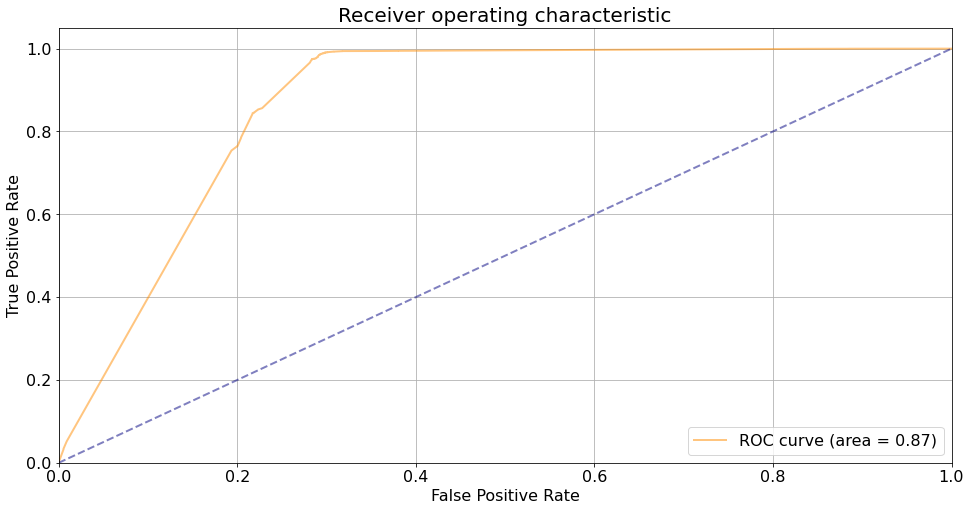

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

ROC-кривая - зависимость TPR от FPR, каждая точка - граница принятия решений

In [42]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

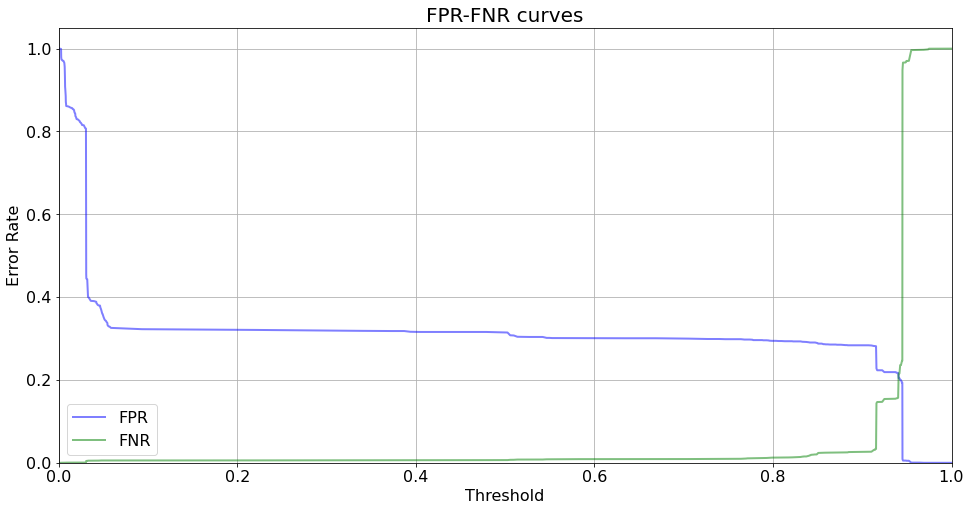

In [43]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

FPR - число объектов отрицательного класса, на которых мы ошиблись

FNR - число объектов положительного класса, на которых мы ошиблись (в нашей задаче, он должен быть маленький, т.к. важно определить объекты положительного класса), соответственно выбрать границу ближе к левому краю

In [44]:
#выбор точки принятия решений
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01)) #хотим ошибаться в 1% объектов положительного класса
print(select_threshold(model=model, data=eval_pool, FPR=0.01)) #хотим меньше ошибаться в определении объектов отрицательного класса

0.7641341915307123
0.9450941216308675


Model predictions

In [45]:
#[Вероятность класса 0; Вероятность класса 1]
print(model.predict_proba(X=X_validation))

[[0.0551 0.9449]
 [0.0551 0.9449]
 [0.0551 0.9449]
 ...
 [0.9932 0.0068]
 [0.0841 0.9159]
 [0.0551 0.9449]]


In [46]:
#Возвращает классы(граница принятия решения 0.5)
print(model.predict(data=X_validation))

[1 1 1 ... 0 1 1]


Получаем более быстрое предсказание

In [47]:
X_prepared = X_validation.values.astype(str).astype(object)
# For FeaturesData class categorial features must have type str

#в predict_proba передается класс FeaturesData, в кот передается np.Array с фичами
fast_predictions = model.predict_proba(
    X=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X_validation)
    )
)
print(fast_predictions)

[[0.0551 0.9449]
 [0.0551 0.9449]
 [0.0551 0.9449]
 ...
 [0.9932 0.0068]
 [0.0841 0.9159]
 [0.0551 0.9449]]


Metric evaluation on a new dataset (используется чтобы посчитать метрики, не обучая модель заново)

In [48]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.5824891	total: 40ms	remaining: 3.96s
50:	learn: 0.2164600	total: 3.98s	remaining: 3.82s
99:	learn: 0.2156549	total: 7.42s	remaining: 0us


In [49]:
metrics = model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Feature Importances

In [50]:
#важность фичей
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,CABLE_ERROR_STATE,91.601741
1,Y_CPU_TEMPERATURE,3.005321
2,Y_MODEM_MOBILE_SIGNAL_TYPE,1.154944
3,Y_HLC_TARGET_VOLTAGE,0.837827
4,Y_HLC_TARGET_CURRENT,0.694656
5,CABLE_TEMPERATURE,0.465115
6,Y_HLC_EV_ERROR_STATE,0.311477
7,Y_MODEM_PING,0.287733
8,Y_CPU_VOLTAGE_INPUT,0.281349
9,Y_LOGIC_BOARD_TEMPERATURE,0.252750


Shap values (нужно посмотреть важность фичей не по всему датасету, а по конкр объектам )

In [51]:
#возвращает матрицу, где число строк - число объектов, число столбцов - число фичей + 1
shap_values = model.get_feature_importance(Pool(X, label=y, cat_features=cat_features), type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(59187, 59)


In [52]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3,:], X.iloc[3,:])

In [53]:
# !pip install numpy==1.21

In [54]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[91,:], X.iloc[91,:])

In [ ]:
shap.summary_plot(shap_values, X)

In [56]:
X_small = X.iloc[0:200]
shap_small = shap_values[:200]
shap.force_plot(expected_value, shap_small, X_small)

Saving the model

In [85]:
my_best_model = model
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [86]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 100, 'learning_rate': 0.1, 'random_seed': 63, 'loss_function': 'Logloss', 'verbose': 50}
63


Hyperparameter tunning

Training speed (повышение скорости)

In [109]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy', 'F1'],
    boosting_type='Plain', #тип бустинга
    bootstrap_type='Bernoulli', #тип сэмплирования
    subsample=0.5, #процент объектов, которые будут использоваться при построении дерева
    one_hot_max_size=20, 
    rsm=0.5,
    leaf_estimation_iterations=5, #5 раз считаем значения одного и того же дерева в листьях
    max_ctr_complexity=1) #комбинации фичей
    
fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Accuracy (повышение качества)

In [100]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

- Важно следить за тем, чтобы переобучение было в конце, 
- Если оно по середине - уменьшить lr в два раза (если число итераций увеличиваем в 10 раз, lr нужно уменьшить в 10 раз)

In [101]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.059057
0:	learn: 0.6259756	total: 112ms	remaining: 1m 51s
100:	learn: 0.2185838	total: 17.4s	remaining: 2m 33s
200:	learn: 0.2175155	total: 31.1s	remaining: 2m 3s
300:	learn: 0.2166505	total: 50.1s	remaining: 1m 55s
400:	learn: 0.2157599	total: 1m 6s	remaining: 1m 39s
500:	learn: 0.2149870	total: 1m 22s	remaining: 1m 21s
600:	learn: 0.2142787	total: 1m 40s	remaining: 1m 5s
700:	learn: 0.2137006	total: 2m	remaining: 50.7s
800:	learn: 0.2131775	total: 2m 20s	remaining: 34.2s
900:	learn: 0.2126466	total: 2m 42s	remaining: 17.1s
995:	learn: 0.2122115	total: 3m	remaining: 0us


Calculate predictions

In [72]:
X_test = test_df.drop('y', axis=1).astype("string")
test_pool = Pool(data=X_test, cat_features=cat_features)
predictions = fast_model.predict_proba(test_pool)
print('Predictoins:')
print(predictions)

Predictoins:
[[0.0565 0.9435]
 [0.0543 0.9457]
 [0.0543 0.9457]
 ...
 [0.9789 0.0211]
 [0.0878 0.9122]
 [0.0878 0.9122]]


In [102]:
y_true = pd.DataFrame(test_df.y)
y_pred = best_model.predict(test_pool)

In [103]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.9434344799621545
0.9660129126568401
0.941358024691358
0.9919939954966225


Saving the fast model

In [87]:
fast_model.save_model('fast_model.bin')
fast_model.save_model('fast_model.json', format='json')

In [104]:
best_model.save_model('fast_model.bin')
best_model.save_model('fast_model.json', format='json')